In [34]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from typing import TypedDict
from langchain_openai import ChatOpenAI

In [2]:
load_dotenv()


False

In [3]:
model = ChatOpenAI()

In [35]:
class CricketLLM(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    strike_rate: float
    boundary_perc: float
    balls_per_boundary: float
    summary: str

In [56]:
def strike_rate(state: CricketLLM) -> CricketLLM:
    
    sr = (state['runs']/state['balls'])*100
    
    return {'strike_rate': sr}

In [55]:
def boundary_perc(state: CricketLLM) -> CricketLLM:
    
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_perc': boundary_percent}


In [54]:
def balls_per_boundary(state: CricketLLM) -> CricketLLM:
    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'balls_per_boundary': bpb}

In [57]:
def summary(state: CricketLLM) -> CricketLLM:
    summary = f"""
    strike_rate - {state['strike_rate']} \n
    balls per boundary - {state['balls_per_boundary']} \n
    boundary percentage - {state['boundary_perc']}
    """
    
   
    return {'summary': summary}

In [58]:
graph = StateGraph(CricketLLM)

graph.add_node('strike_rate',strike_rate)
graph.add_node('boundary_perc',boundary_perc)
graph.add_node('balls_per_boundary',balls_per_boundary)
graph.add_node('summary',summary)

graph.add_edge(START,'strike_rate')
graph.add_edge(START,'boundary_perc')
graph.add_edge(START,'balls_per_boundary')

graph.add_edge('strike_rate','summary')
graph.add_edge('boundary_perc','summary')
graph.add_edge('balls_per_boundary','summary')

graph.add_edge('summary',END)

workflow = graph.compile()



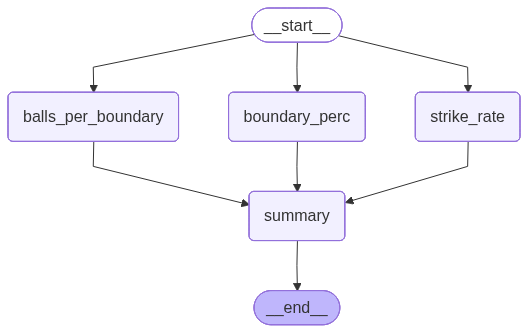

In [59]:
workflow

In [61]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}
workflow.invoke(intial_state)


{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'strike_rate': 200.0,
 'boundary_perc': 48.0,
 'balls_per_boundary': 5.0,
 'summary': '\n    strike_rate - 200.0 \n\n    balls per boundary - 5.0 \n\n    boundary percentage - 48.0\n    '}